In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
% matplotlib inline
from six.moves import cPickle
from sklearn.preprocessing import LabelEncoder
from six.moves import cPickle

In [3]:
cntt = pd.read_csv('./Data/challenge_Data/BGCON_CNTT_DATA.csv',
                          encoding = 'utf-16')

In [4]:
cntt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113010 entries, 0 to 113009
Data columns (total 21 columns):
POLY_NO           113010 non-null int64
CUST_ID           113010 non-null int64
CUST_ROLE         113010 non-null int64
IRKD_CODE_DTAL    113010 non-null int64
IRKD_CODE_ITEM    113010 non-null int64
GOOD_CLSF_CDNM    113010 non-null object
CNTT_YM           113010 non-null int64
CLLT_FP_PRNO      112928 non-null float64
REAL_PAYM_TERM    113010 non-null int64
SALE_CHNL_CODE    113010 non-null int64
CNTT_STAT_CODE    112928 non-null object
EXPR_YM           112928 non-null float64
EXTN_YM           58793 non-null float64
LAPS_YM           21381 non-null float64
PAYM_CYCL_CODE    112928 non-null float64
MAIN_INSR_AMT     112928 non-null float64
SUM_ORIG_PREM     112928 non-null float64
RECP_PUBL         112926 non-null float64
CNTT_RECP         112926 non-null float64
MNTH_INCM_AMT     112928 non-null float64
DISTANCE          102454 non-null float64
dtypes: float64(11), int64(

In [12]:
cntt.MNTH_INCM_AMT.dropna().std()

3353642.9065015647

In [5]:
cntt.describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,POLY_NO,CUST_ID,CUST_ROLE,IRKD_CODE_DTAL,IRKD_CODE_ITEM,CNTT_YM,CLLT_FP_PRNO,REAL_PAYM_TERM,SALE_CHNL_CODE,EXPR_YM,EXTN_YM,LAPS_YM,PAYM_CYCL_CODE,MAIN_INSR_AMT,SUM_ORIG_PREM,RECP_PUBL,CNTT_RECP,MNTH_INCM_AMT,DISTANCE
count,113010.000000,113010.000000,113010.000000,113010.000000,113010.000000,113010.000000,1.129280e+05,113010.000000,113010.000000,112928.000000,58793.000000,21381.000000,112928.000000,1.129280e+05,1.129280e+05,112926.000000,112926.000000,1.129280e+05,102454.000000
mean,56362.036793,10995.734475,1.945704,1468.108716,54.818344,200629.529670,6.853475e+04,32.066277,1.431528,621658.182258,200838.797289,200845.710304,1.452049,3.049705e+07,5.473286e+05,1.042346,1.869198,2.305929e+06,37.129600
std,32553.620589,6488.041214,3.484196,210.523998,146.907476,498.441181,2.304084e+06,137.161183,1.227679,398118.645952,485.321717,487.203584,2.308805,3.623059e+07,4.544866e+06,4.084199,14.639717,3.353643e+06,75.858356
min,1.000000,1.000000,0.000000,1078.000000,1.000000,199504.000000,2.000000e+00,0.000000,1.000000,196007.000000,199801.000000,199804.000000,0.000000,0.000000e+00,3.000000e+01,-1.000000,0.000000,0.000000e+00,0.000000
25%,28164.250000,5295.250000,1.000000,1257.000000,4.000000,200207.000000,NaN,7.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,56348.500000,11211.000000,1.000000,1603.000000,13.000000,200607.500000,NaN,10.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,84557.750000,16552.000000,2.000000,1627.000000,38.000000,201011.000000,NaN,20.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,112769.000000,22400.000000,21.000000,1821.000000,847.000000,201605.000000,1.000000e+08,999.000000,7.000000,999912.000000,201607.000000,201606.000000,12.000000,1.850000e+09,5.000000e+08,363.000000,655.000000,3.500000e+08,747.000000


# Step1

In [4]:
description = pd.read_excel('./Data/challenge_Data/description.xlsx', sheetname='BGCON_CNTT_DATA')
categorical = list(description.loc[description['변수타입'] == 'C', '변수영문명'])
numerical = list(description.loc[description['변수타입'] == 'N', '변수영문명'])

In [5]:
features = list(cntt.columns)
target = []
for feature in features:
    if cntt[feature].isnull().sum() != 0:
        target.append(feature)

In [6]:
n_target = set(target).intersection(set(numerical))
c_target = set(target).intersection(set(categorical))
n_target = list(n_target)
c_target = list(c_target)

In [7]:
print('Missing Numerical : ', n_target)
print('Missing Categorical : ', c_target)

Missing Numerical :  ['MAIN_INSR_AMT', 'MNTH_INCM_AMT', 'SUM_ORIG_PREM', 'DISTANCE', 'CNTT_RECP', 'RECP_PUBL']
Missing Categorical :  ['CNTT_STAT_CODE', 'LAPS_YM', 'CLLT_FP_PRNO', 'PAYM_CYCL_CODE', 'EXTN_YM', 'EXPR_YM']


# Step2
- Skip because there is no missing value in 'Real_Paym_Term'

# Step3

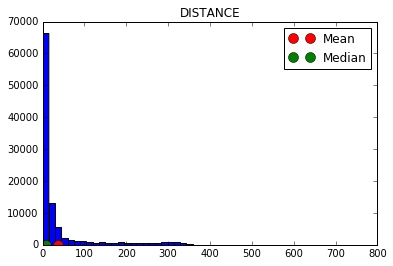

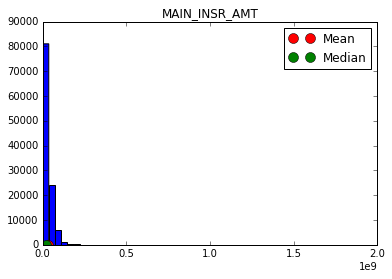

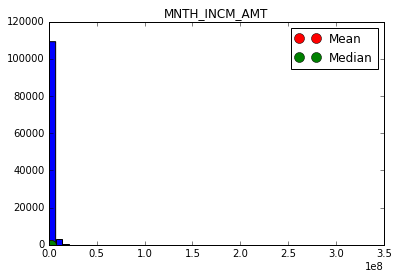

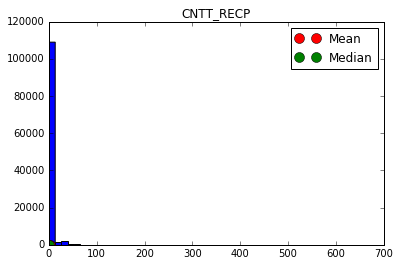

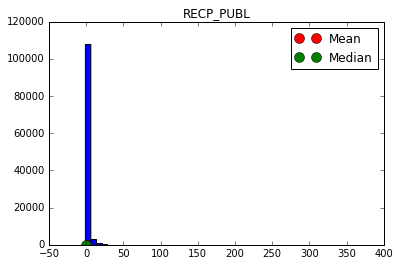

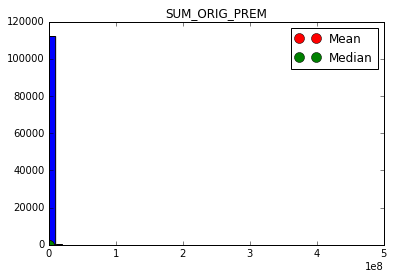

In [8]:
# Decide whether fill missing values with median or mean
n_dic = {}
for nt in n_target:
    values = cntt.loc[~cntt[nt].isnull(), nt].values
    n_dic[nt] = values

for key in list(n_dic.keys()):
    plt.hist(n_dic[key], bins=50)
    plt.plot(np.mean(n_dic[key]), 50, 'ro', markersize=10, label='Mean')
    plt.plot(np.median(n_dic[key]), 50, 'go', markersize=10, label='Median')
    plt.legend(loc=1)
    plt.title(key)
    plt.show()

In [9]:
# Seems filling with median values is plausible
for nt in n_target:
    filling = np.median(cntt.loc[~cntt[nt].isnull(), nt].values)
    cntt.loc[cntt[nt].isnull(), nt] = filling

In [10]:
def cate_go(df, colname):
    cut = np.linspace(df[colname].min(),df[colname].max(),10)

    cate = np.arange(1,10)
    df.loc[df[colname] == cut[0], colname] = 0
    
    for i in range(0,9):
        df.loc[ (df[colname] > cut[i]) & (df[colname] <= cut[i+1]), colname] = cate[i]
    return df

def plot_col(df, colname):
    plt.hist(df[colname], bins=100)
    plt.plot(np.mean(df[colname]), 50, 'ro', markersize=10, label='Mean')
    plt.plot(np.median(df[colname]), 50, 'go', markersize=10, label='Median')
    plt.legend(loc=1)
    plt.title(colname)
    plt.show()

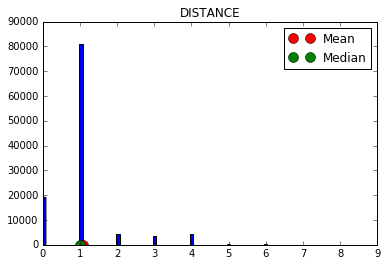

In [11]:
cntt = cate_go(cntt, 'DISTANCE')
plot_col(cntt, 'DISTANCE')


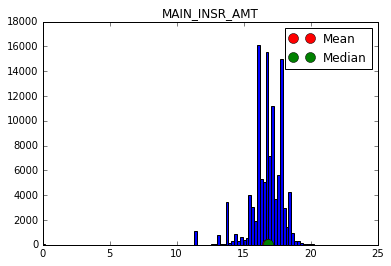

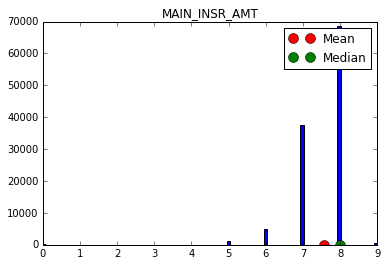

In [12]:
cntt['MAIN_INSR_AMT'] = np.log(cntt['MAIN_INSR_AMT'])
cntt.loc[cntt['MAIN_INSR_AMT'] == -np.inf, 'MAIN_INSR_AMT'] = 0
plot_col(cntt, 'MAIN_INSR_AMT')
cntt = cate_go(cntt, 'MAIN_INSR_AMT')
plot_col(cntt, 'MAIN_INSR_AMT')


# Step4

In [13]:
# 'CNTT_STAT_CODE' needs special treatment
cntt.loc[cntt['CNTT_STAT_CODE'].isnull(), 'CNTT_STAT_CODE'] = '-999'

In [14]:
X = cntt.loc[cntt['CNTT_STAT_CODE'] != '-999', 'CNTT_STAT_CODE'].values
lbl_enc = LabelEncoder()
lbl_enc.fit(X)

for element in lbl_enc.classes_:
    cntt.loc[cntt['CNTT_STAT_CODE'] == element, 'CNTT_STAT_CODE'] = lbl_enc.transform(element)

cntt.loc[cntt['CNTT_STAT_CODE'] == '-999', 'CNTT_STAT_CODE'] = -999

In [15]:
cntt['CNTT_STAT_CODE'] = cntt['CNTT_STAT_CODE'].astype(np.int64)

In [16]:
# Labeling 'GOOD_CLSF_CDNM' 
X = cntt['GOOD_CLSF_CDNM'].values
lbl_enc = LabelEncoder()
lbl_enc.fit(X)

for element in lbl_enc.classes_:
    cntt.loc[cntt['GOOD_CLSF_CDNM'] == element, 'GOOD_CLSF_CDNM'] = lbl_enc.transform(element)

In [17]:
cntt['GOOD_CLSF_CDNM'] = cntt['GOOD_CLSF_CDNM'].astype(np.int64)

# Step5

In [18]:
c_target.remove('CNTT_STAT_CODE')

In [19]:
for ct in c_target:
    cntt.loc[cntt[ct].isnull(), ct] = -999

In [20]:
cntt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113010 entries, 0 to 113009
Data columns (total 21 columns):
POLY_NO           113010 non-null int64
CUST_ID           113010 non-null int64
CUST_ROLE         113010 non-null int64
IRKD_CODE_DTAL    113010 non-null int64
IRKD_CODE_ITEM    113010 non-null int64
GOOD_CLSF_CDNM    113010 non-null int64
CNTT_YM           113010 non-null int64
CLLT_FP_PRNO      113010 non-null float64
REAL_PAYM_TERM    113010 non-null int64
SALE_CHNL_CODE    113010 non-null int64
CNTT_STAT_CODE    113010 non-null int64
EXPR_YM           113010 non-null float64
EXTN_YM           113010 non-null float64
LAPS_YM           113010 non-null float64
PAYM_CYCL_CODE    113010 non-null float64
MAIN_INSR_AMT     113010 non-null float64
SUM_ORIG_PREM     113010 non-null float64
RECP_PUBL         113010 non-null float64
CNTT_RECP         113010 non-null float64
MNTH_INCM_AMT     113010 non-null float64
DISTANCE          113010 non-null float64
dtypes: float64(11), int64(

# Step 6

In [21]:
def year_convert(input):
    if input < 0:
        return -9999
    else:
        string_type = str(input)

        string_year = string_type[0:4]

        return np.float64(string_year)

def month_convert(input):
    if input < 0 :
        return -9999
    else:
        string_type = str(input)
        string_month = string_type[5:]
        return np.float64(string_month)

def convert(df, colname):
    df[colname+'_Y'] = df[colname].apply(year_convert)
    df[colname+'_M'] = df[colname].apply(month_convert)

    df[colname+'_Y'] =df[colname+'_Y'].astype(np.int64)
    df[colname+'_M'] = df[colname+'_M'].astype(np.int64)
    return df

In [22]:
for colname in ['CNTT_YM', 'EXPR_YM', 'EXTN_YM', 'LAPS_YM']:
    cntt = convert(cntt, colname)
    cntt.drop(colname, axis = 1, inplace = True)

# Step7

In [23]:
label_id = cPickle.load(open('./Dump/label_id.pkl', 'rb'))

In [24]:
cntt = pd.merge(cntt, label_id, on='CUST_ID')
features = cntt.columns

In [25]:
train_set = cntt.loc[cntt['DIVIDED_SET'] == 1, features]
test_set = cntt.loc[cntt['DIVIDED_SET'] == 2, features]

In [26]:
cPickle.dump(cntt, open('./Dump/cntt.pkl', 'wb'), -1)
cPickle.dump(train_set, open('./Dump/cntt_train.pkl', 'wb'), -1)
cPickle.dump(test_set, open('./Dump/cntt_test.pkl', 'wb'), -1)